# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
dataset = pd.read_csv('Data.csv')
# dataset/
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [3]:
print(dataset.shape)

(10, 4)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [5]:
#Print Information datatypes

dataset.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [6]:
#count total number of classes in dataset

class_counts = dataset.groupby('Purchased').size()
print(class_counts)

Purchased
No     5
Yes    5
dtype: int64


In [7]:
class_counts = dataset.groupby('Country').size()
print(class_counts)

Country
France     4
Germany    3
Spain      3
dtype: int64


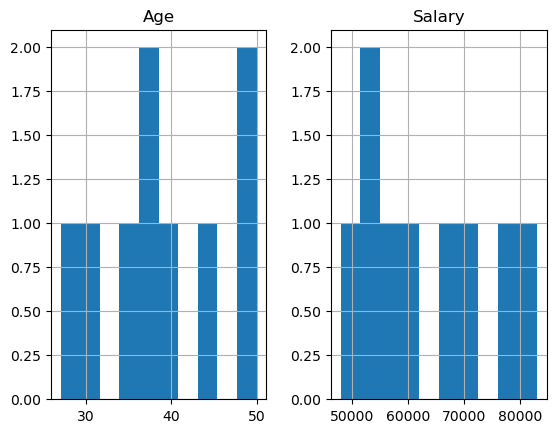

In [8]:
dataset.hist()
plt.show()

In [9]:
# Extracting dependent and independent  variables:

#Extracting independent variable
x= dataset.iloc[:,[0,1,2]].values

#Extracting dependent variable
y=dataset.iloc[:,3].values



In [10]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [11]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [12]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [13]:
# taking care of missing data 
#handling missing data(replacing missing data with mean value)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NAN, strategy='mean', fill_value=None, verbose=1, copy=True)

#if verbose=0 means quit you just get the total number of test executed and global result , verbose=1 you get the same plus a dot
# for every successful test 
# verbose value 2 you get the help string of the test every result

#fitting imputer object to the independent variable x.
imputer=imputer.fit(x[:, 1:3])

#replacing missing data with the calculated mean value
x[:, 1:3]= imputer.transform(x[:,1:3])

C:\Users\Shyam Singh\anaconda3\lib\site-packages\sklearn\impute\_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [14]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [15]:
details = pd.DataFrame(x, columns=['Country', 'Age', 'Salary'])
details.isnull().sum()  

Country    0
Age        0
Salary     0
dtype: int64

In [16]:
#Encoding Categorical data:
#Encoding the independent Variable

from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
x[:, 0]= labelencoder_X.fit_transform(x[:,0])
print(x)


[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 63777.77777777778]
 [0 35.0 58000.0]
 [2 38.77777777777778 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


In [17]:
#dummy encoding.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer=ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x=columnTransformer.fit_transform(x)  
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [18]:
#Encoding the dependent variable

labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [19]:
#splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [20]:
print(X_train)

[[1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]]


In [21]:
print(y_train)

[1 0 1 0 1 1 0 0]


In [22]:
print(X_test)

[[0.0 1.0 0.0 50.0 83000.0]
 [0.0 0.0 1.0 27.0 48000.0]]


In [23]:
print(y_test)

[0 1]


In [24]:
# standarisation = x-mean of x/standard deviation
# normalisation = x-min of x/max of x - min of x

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train)

[[ 1.         -0.57735027 -0.57735027 -0.7529426  -0.62603778]
 [ 1.         -0.57735027 -0.57735027  1.00845381  1.01304295]
 [ 1.         -0.57735027 -0.57735027  1.79129666  1.83258331]
 [-1.          1.73205081 -0.57735027 -1.73149616 -1.09434656]
 [ 1.         -0.57735027 -0.57735027 -0.36152118  0.42765698]
 [-1.          1.73205081 -0.57735027  0.22561096  0.05040824]
 [-1.         -0.57735027  1.73205081 -0.16581046 -0.27480619]
 [-1.         -0.57735027  1.73205081 -0.01359102 -1.32850095]]


In [26]:
print(X_test)

[[-1.          1.73205081 -0.57735027  2.18271808  2.30089209]
 [-1.         -0.57735027  1.73205081 -2.3186283  -1.79680973]]
